In [1]:
 import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import pandas as pd


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Cars.csv');

In [5]:
data.shape

(398, 9)

In [6]:
data.columns.values

array(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'], dtype=object)

In [7]:
data.set_index('name', inplace=True)

In [8]:
data['mpg'].unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [9]:
data['hp_per_weight'] = data['horsepower'] / data['weight']
data.set_index('hp_per_weight', inplace=True)

In [12]:
(data['mpg'] >= 35).sum()

np.int64(36)

In [13]:
data[(data['horsepower'] > 100) & (data['weight'] < 3000)]['origin'].mode()[0]

'usa'

In [14]:
round(data[data['origin'] == 'japan']['acceleration'].mean())


16

In [15]:
data.groupby('model_year')['mpg'].mean().idxmax()

np.int64(80)

In [16]:
median_mpg = data['mpg'].median()
above_median = data[data['mpg'] > median_mpg]
best_ratio = (above_median['horsepower'] / above_median['weight']).max()
above_median[above_median['horsepower'] / above_median['weight'] == best_ratio]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
hp_per_weight,,,,,,,,
0.050582,26.0,4,121.0,113.0,2234,12.5,70,europe


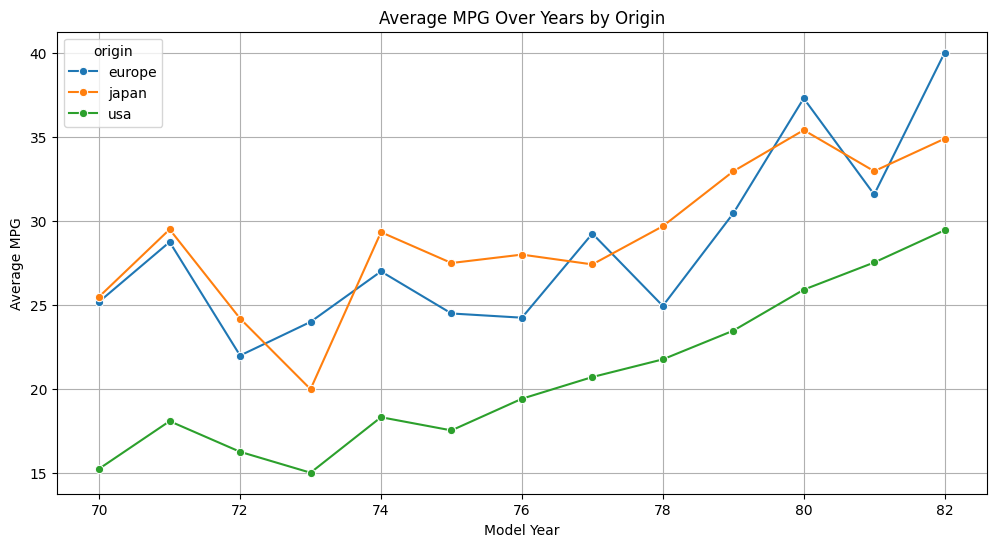

In [17]:
import seaborn as sns
avg_mpg = data.groupby(['model_year', 'origin'])['mpg'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_mpg, x='model_year', y='mpg', hue='origin', marker='o')
plt.title('Average MPG Over Years by Origin')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True)
plt.show()


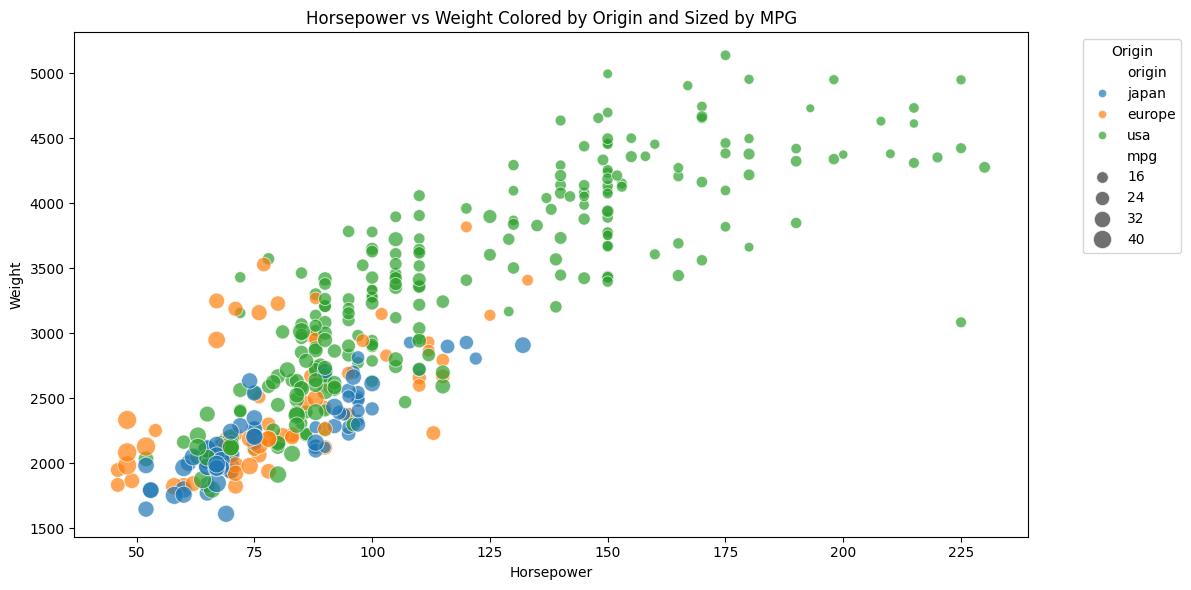

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your pandas DataFrame.
# If you don't have it, here's an example of how you might load a common dataset
# like the 'mpg' dataset, which contains these columns:
try:
    data = sns.load_dataset('mpg')
except Exception as e:
    print(f"Could not load mpg dataset directly: {e}")
    print("Please ensure you have a DataFrame named 'data' with 'horsepower', 'weight', 'origin', and 'mpg' columns.")
    # Create a dummy DataFrame for demonstration if load fails
    data = pd.DataFrame({
        'horsepower': [150, 100, 75, 120, 90, 180, 60, 110, 135, 85],
        'weight': [3000, 2500, 2000, 2800, 2300, 3500, 1800, 2600, 3100, 2100],
        'origin': ['usa', 'japan', 'europe', 'usa', 'japan', 'usa', 'europe', 'usa', 'japan', 'europe'],
        'mpg': [18, 25, 30, 22, 28, 15, 35, 20, 24, 27]
    })


plt.figure(figsize=(12, 6)) # Set the figure size for better readability

sns.scatterplot(
    data=data,         # Your DataFrame
    x='horsepower',    # X-axis variable
    y='weight',        # Y-axis variable
    hue='origin',      # Color points by 'origin'
    size='mpg',        # Size points by 'mpg'
    sizes=(40, 200),   # Range of sizes for the points
    hue_order=['japan', 'europe', 'usa'], # Specify the order of hue categories
    alpha=0.7          # Set transparency of points
)

plt.title('Horsepower vs Weight Colored by Origin and Sized by MPG') # Main plot title
plt.xlabel('Horsepower') # X-axis label
plt.ylabel('Weight')     # Y-axis label

# Place the legend outside the plot area
plt.legend(title='Origin', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout() # Adjust layout to prevent labels/titles from overlapping
plt.show() # Display the plot

In [23]:
import pandas as pd
import seaborn as sns
import numpy as np

# Load the mpg dataset
try:
    df = sns.load_dataset('mpg')
    # The 'mpg' dataset typically has a column named 'name' for the car model.
    # If for some reason it's loaded with a different name or you're using a custom dataset,
    # you might need to adjust this.
    # print(df.columns) # Uncomment to check actual column names if you still face issues.
except Exception as e:
    print(f"Could not load mpg dataset directly: {e}")
    print("Please ensure you have a DataFrame named 'df' with 'name', 'model_year', and 'mpg' columns.")
    # Fallback: Create a dummy DataFrame for demonstration if loading fails
    data = {
        'mpg': [18.0, 15.0, 18.0, 20.0, 20.5, 20.8, 22.0, 22.1, 22.0, 25.0,
                25.1, 24.9, 19.0, 19.2, 19.0, 16.0, 16.5, 16.0, 21.0, 21.2],
        'cylinders': [8, 8, 8, 4, 4, 4, 4, 4, 4, 4,
                      4, 4, 6, 6, 6, 8, 8, 8, 6, 6],
        'displacement': [307.0, 350.0, 318.0, 97.0, 98.0, 97.0, 110.0, 112.0, 110.0, 107.0,
                         108.0, 107.0, 250.0, 250.0, 250.0, 305.0, 305.0, 305.0, 200.0, 200.0],
        'horsepower': [130.0, 165.0, 150.0, 88.0, 89.0, 88.0, 92.0, 93.0, 92.0, 86.0,
                       87.0, 86.0, 105.0, 106.0, 105.0, 130.0, 132.0, 130.0, 90.0, 90.5],
        'weight': [3504, 3693, 3436, 2130, 2150, 2130, 2265, 2280, 2265, 2408,
                   2420, 2408, 3725, 3750, 3725, 3500, 3520, 3500, 2500, 2510],
        'acceleration': [12.0, 11.5, 11.0, 14.5, 14.0, 14.5, 15.5, 15.0, 15.5, 14.0,
                         14.1, 14.0, 19.0, 18.8, 19.0, 12.0, 11.8, 12.0, 16.0, 15.8],
        'model_year': [70, 70, 70, 75, 76, 77, 78, 79, 80, 75,
                       76, 77, 70, 71, 72, 75, 76, 77, 78, 79],
        'origin': ['usa', 'usa', 'usa', 'japan', 'japan', 'japan', 'europe', 'europe', 'europe', 'usa',
                   'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'japan', 'japan'],
        'name': ['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite', 'toyota corolla', 'toyota corolla',
                     'toyota corolla', 'volkswagen rabbit', 'volkswagen rabbit', 'volkswagen rabbit', 'ford pinto',
                     'ford pinto', 'ford pinto', 'amc gremlin', 'amc gremlin', 'amc gremlin', 'oldsmobile cutlass salon',
                     'oldsmobile cutlass salon', 'oldsmobile cutlass salon', 'honda civic', 'honda civic']
    }
    df = pd.DataFrame(data)


# Step 1: Identify car names that appear in more than one 'model_year'.
# Group by 'name' (the correct column name) and count the number of unique 'model_year' values for each car.
car_years_count = df.groupby('name')['model_year'].nunique()

# Filter to get only car names that appear in more than one year
multi_year_cars = car_years_count[car_years_count > 1].index.tolist()

# Filter the original DataFrame to include only these multi-year cars
df_multi_year = df[df['name'].isin(multi_year_cars)].copy() # Use .copy() to avoid SettingWithCopyWarning


# Step 2: Compute the standard deviation of 'mpg' across years for each such name.
# Also, compute the average 'mpg' and the total number of appearances for each car name.
consistent_cars_stats = df_multi_year.groupby('name').agg(
    mpg_std=('mpg', 'std'),
    mpg_avg=('mpg', 'mean'),
    appearances=('model_year', 'count') # Count total rows for each car name across years
).reset_index()

# Handle cases where std is NaN (e.g., if a car only appeared once in the filtered list
# or if there's only one MPG reading for that car name across its multiple years due to previous filtering/cleaning).
# We fill NaN std with a large number (infinity) so it will be excluded by the < 1.0 filter.
consistent_cars_stats['mpg_std'] = consistent_cars_stats['mpg_std'].fillna(np.inf)


# Step 3: Filter for std(mpg) < 1.0
consistent_cars_filtered = consistent_cars_stats[consistent_cars_stats['mpg_std'] < 1.0]

# Ensure that the filtered cars also appeared at least 2 times (this is generally covered
# by 'multi_year_cars' filtering, but an explicit check can be useful).
consistent_cars_filtered = consistent_cars_filtered[consistent_cars_filtered['appearances'] >= 2]


# Step 4 & 5: Return the car(s) with the lowest variation in mpg,
# Report the model name(s), number of appearances, and the average mpg.
if not consistent_cars_filtered.empty:
    min_std = consistent_cars_filtered['mpg_std'].min()
    lowest_variation_cars = consistent_cars_filtered[consistent_cars_filtered['mpg_std'] == min_std]

    # Step 6: Sort the result by number of appearances (descending), then average mpg (descending).
    final_result = lowest_variation_cars.sort_values(
        by=['appearances', 'mpg_avg'], ascending=[False, False]
    )

    print("Consistent Car Model(s) with Lowest MPG Variation (standard deviation < 1.0):")
    print("-----------------------------------------------------------------------------")
    # Display the required columns, formatted for readability
    print(final_result[['name', 'appearances', 'mpg_avg', 'mpg_std']].round(2).to_string(index=False))
else:
    print("No car models found that meet the criteria (produced over multiple years and std(mpg) < 1.0).")

Consistent Car Model(s) with Lowest MPG Variation (standard deviation < 1.0):
-----------------------------------------------------------------------------
        name  appearances  mpg_avg  mpg_std
datsun pl510            2     27.0      0.0
